In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Reading CSV File
df = pd.read_csv("/content/netflix1.csv")
df.sample(5)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
6177,s8371,Movie,The Jack King Affair,"Benjamin Cohen, Nicolas Cotto",France,1/2/2018,2015,TV-14,52 min,"Documentaries, International Movies"
410,s299,Movie,Quam's Money,Kayode Kasum,Nigeria,8/6/2021,2020,TV-MA,115 min,"Comedies, Dramas, International Movies"
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
8235,s5678,TV Show,Tokyo Trial,Not Given,Canada,12/13/2016,2017,TV-MA,1 Season,"International TV Shows, TV Dramas"
5633,s7688,Movie,P,Paul Spurrier,United Kingdom,5/31/2019,2006,TV-MA,105 min,"Horror Movies, International Movies"


In [ ]:
missing_values= df.isnull().sum()
print(missing_values)

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64


Data is already clean

In [ ]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [ ]:
df.drop(["show_id"], axis=1, inplace=True)

In [ ]:
df.shape

(8790, 9)

In [ ]:
df.size

79110

In [ ]:
df.index

RangeIndex(start=0, stop=8790, step=1)

In [ ]:
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8790 non-null   object
 1   title         8790 non-null   object
 2   director      8790 non-null   object
 3   country       8790 non-null   object
 4   date_added    8790 non-null   object
 5   release_year  8790 non-null   int64 
 6   rating        8790 non-null   object
 7   duration      8790 non-null   object
 8   listed_in     8790 non-null   object
dtypes: int64(1), object(8)
memory usage: 618.2+ KB


In [ ]:
df["rating"].unique()

array(['PG-13', 'TV-MA', 'TV-PG', 'TV-14', 'TV-Y7', 'TV-Y', 'PG', 'TV-G',
       'R', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

converting date_added to date time format

In [ ]:
df["date_added"] = df["date_added"].str.replace(",","")

In [ ]:
df["date_added"] = pd.to_datetime(df["date_added"], format="mixed")

In [ ]:
df["year"] = df["date_added"].dt.year

In [ ]:
df["month"] = df["date_added"].dt.month_name()

In [ ]:
df["date"] = df["date_added"].dt.day

In [ ]:
df["genre"] = df["listed_in"].str.split(",").str[0]

In [ ]:
df["genre"].value_counts().head(5)

,count
genre,
Dramas,1599
Comedies,1210
Action & Adventure,859
Documentaries,829
International TV Shows,773


In [ ]:
movies_df = df[df["type"]=="Movie"]
movies_df.head(5)

,type,title,director,country,date_added,release_year,rating,duration,listed_in,year,month,date,genre
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,September,25,Documentaries
3,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",2021,September,22,Children & Family Movies
4,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",2021,September,24,Dramas
6,Movie,The Starling,Theodore Melfi,United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",2021,September,24,Comedies
7,Movie,Motu Patlu in the Game of Zones,Suhas Kadav,India,2021-05-01,2019,TV-Y7,87 min,"Children & Family Movies, Comedies, Music & Mu...",2021,May,1,Children & Family Movies


In [ ]:
movies_df = movies_df.copy()
movies_df.loc[:, 'duration_min'] = movies_df["duration"].str.split(" ").str[0].astype(int)

In [ ]:
movies_df.drop(["duration"], axis=1, inplace=True)
movies_df.head(5)

,type,title,director,country,date_added,release_year,rating,listed_in,year,month,date,genre,duration_min
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,Documentaries,2021,September,25,Documentaries,90
3,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,"Children & Family Movies, Comedies",2021,September,22,Children & Family Movies,91
4,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,"Dramas, Independent Movies, International Movies",2021,September,24,Dramas,125
6,Movie,The Starling,Theodore Melfi,United States,2021-09-24,2021,PG-13,"Comedies, Dramas",2021,September,24,Comedies,104
7,Movie,Motu Patlu in the Game of Zones,Suhas Kadav,India,2021-05-01,2019,TV-Y7,"Children & Family Movies, Comedies, Music & Mu...",2021,May,1,Children & Family Movies,87


In [ ]:
tv_shows_df = df[df["type"]=="TV Show"]
tv_shows_df.head(5)

,type,title,director,country,date_added,release_year,rating,duration,listed_in,year,month,date,genre
1,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,September,24,Crime TV Shows
2,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",2021,September,24,TV Dramas
5,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",2021,September,24,British TV Shows
17,TV Show,Jailbirds New Orleans,Not Given,Pakistan,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV",2021,September,24,Docuseries
18,TV Show,Crime Stories: India Detectives,Not Given,Pakistan,2021-09-22,2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries",2021,September,22,British TV Shows


In [ ]:
tv_shows_df = tv_shows_df.copy()
tv_shows_df.loc[:, "duration_season"] = tv_shows_df["duration"].str.split(" ").str[0].astype(int)

In [ ]:
tv_shows_df.drop(["duration"], axis=1, inplace=True)
tv_shows_df.head(5)

,type,title,director,country,date_added,release_year,rating,listed_in,year,month,date,genre,duration_season
1,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",2021,September,24,Crime TV Shows,1
2,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,"TV Dramas, TV Horror, TV Mysteries",2021,September,24,TV Dramas,1
5,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,2021-09-24,2021,TV-14,"British TV Shows, Reality TV",2021,September,24,British TV Shows,9
17,TV Show,Jailbirds New Orleans,Not Given,Pakistan,2021-09-24,2021,TV-MA,"Docuseries, Reality TV",2021,September,24,Docuseries,1
18,TV Show,Crime Stories: India Detectives,Not Given,Pakistan,2021-09-22,2021,TV-MA,"British TV Shows, Crime TV Shows, Docuseries",2021,September,22,British TV Shows,1


In [ ]:
df["type"].value_counts()

,count
type,
Movie,6126
TV Show,2664


Tells us how many movies are there as compared to TV shows.

In [ ]:
df["rating"].value_counts()

,count
rating,
TV-MA,3205
TV-14,2157
TV-PG,861
R,799
PG-13,490
TV-Y7,333
TV-Y,306
PG,287
TV-G,220


In [ ]:
df["release_year"].value_counts().head(5)

,count
release_year,
2018,1146
2017,1030
2019,1030
2020,953
2016,901


In [ ]:
df["country"].value_counts().head(5)

,count
country,
United States,3240
India,1057
United Kingdom,638
Pakistan,421
Not Given,287


In [ ]:
df["genre"].value_counts().head(5)

,count
genre,
Dramas,1599
Comedies,1210
Action & Adventure,859
Documentaries,829
International TV Shows,773


In [ ]:
sns.set_style("ticks")

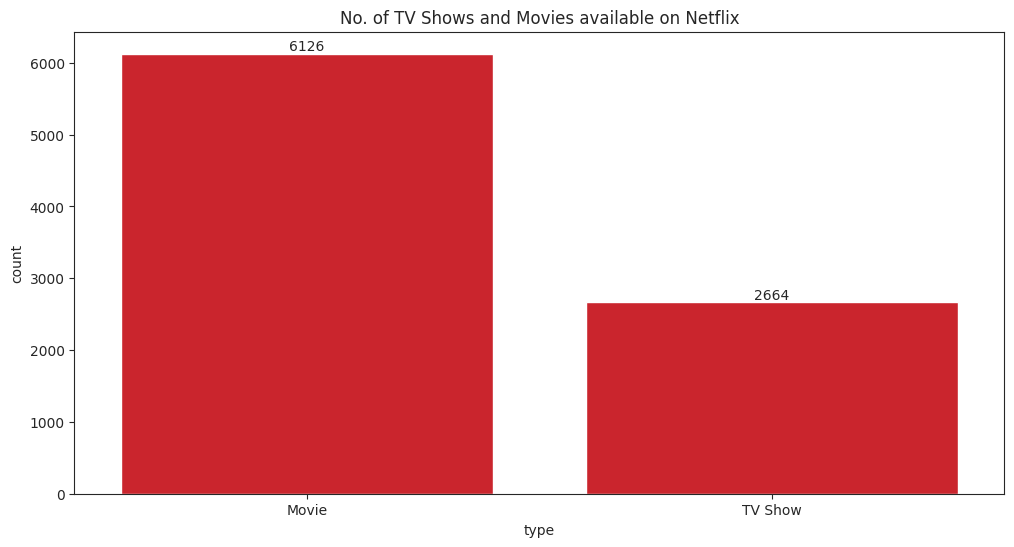

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.countplot(data=df, x="type", color="#E50914", order=df["type"].value_counts().index)
ax.set_title("No. of TV Shows and Movies available on Netflix")
ax.bar_label(ax.containers[0], fontsize=10)
plt.show()

Insights

• Netflix has more number of Movies than TV Shows.

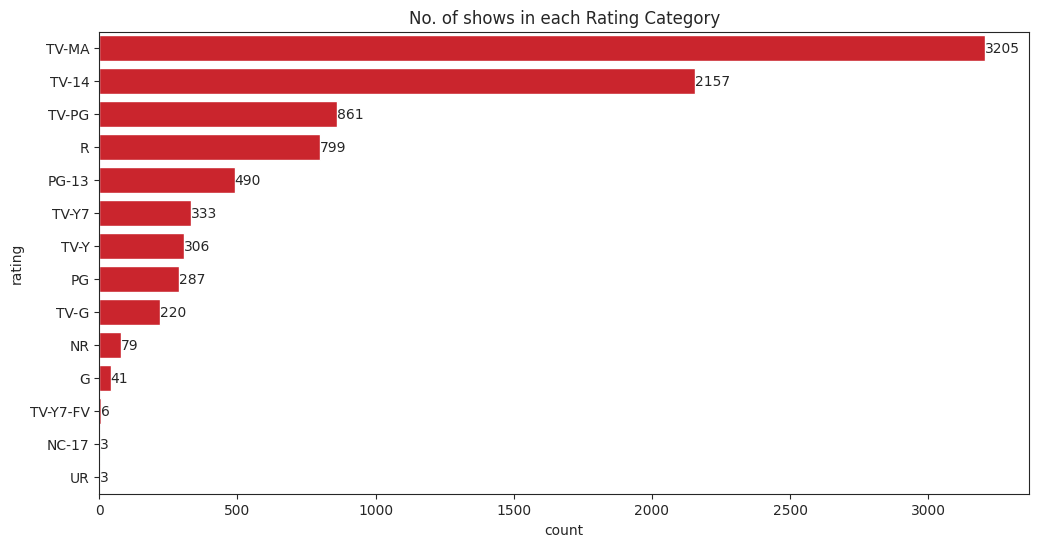

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.countplot(data=df, y="rating", order=df["rating"].value_counts().index, color="#E50914")
ax.set_title("No. of shows in each Rating Category")
ax.bar_label(ax.containers[0], fontsize=10)
plt.show()

Insights

• Large number of shows on Netflix is rated under TV-MA.
TV-MA : Mature Audience Only. Intended for adults and may be unsuitable for children under 17.

• Second largest collection of shows are rated under TV-14.
TV-14 : Suitable for viewing by persons 14 years of age or older. Persons under 14 must be accompanied by an adult.

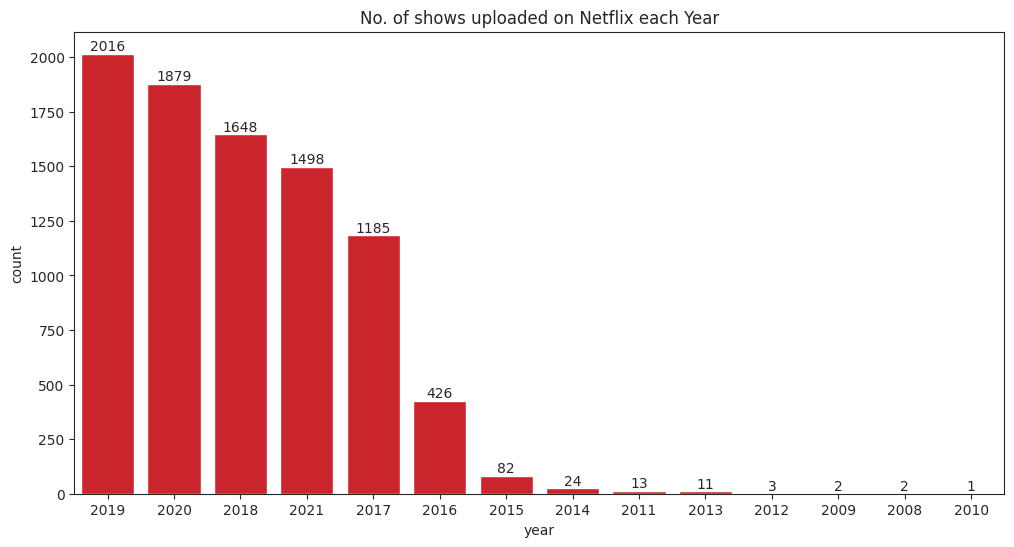

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.countplot(data=df, x="year", order=df["year"].value_counts().index, color="#E50914")
ax.set_title("No. of shows uploaded on Netflix each Year")
ax.bar_label(ax.containers[0], fontsize=10)
plt.show()

Insights

• Most number of shows on Netflix are uploaded in 2019.

• In years 2020, 2018, 2021, 2017, 2016, 2015 shows were uploaded heavily.

• Before 2015, Only few shows were uploaded.

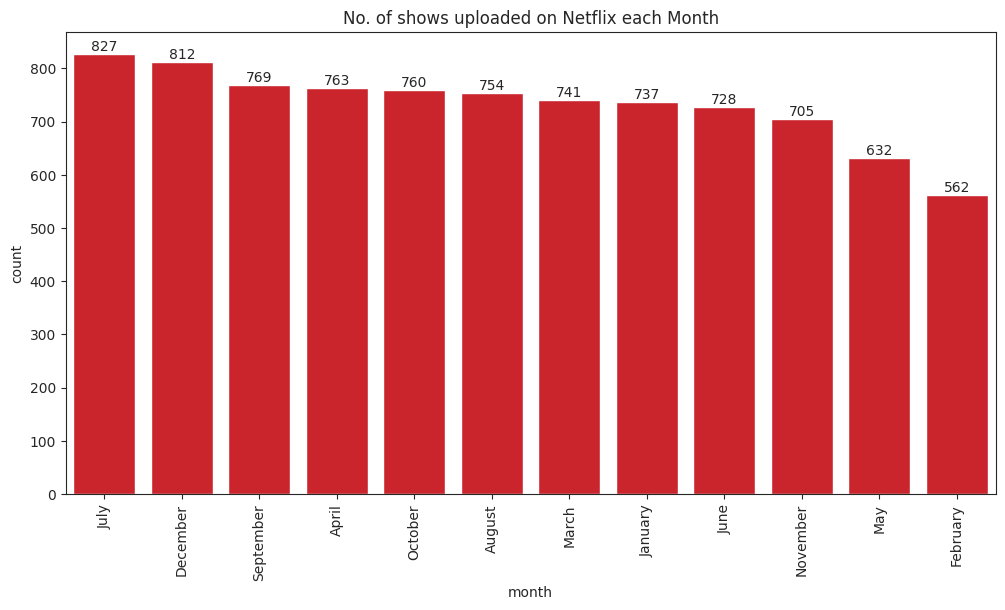

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.countplot(data=df, x="month", order=df["month"].value_counts().index, color="#E50914")
ax.set_title("No. of shows uploaded on Netflix each Month")
ax.tick_params(axis='x', rotation=90)
ax.bar_label(ax.containers[0], fontsize=10)
plt.show()

Insights

• In July and December month, most number of shows are uploaded on Netflix.

• Least shows are uploaded in February month.

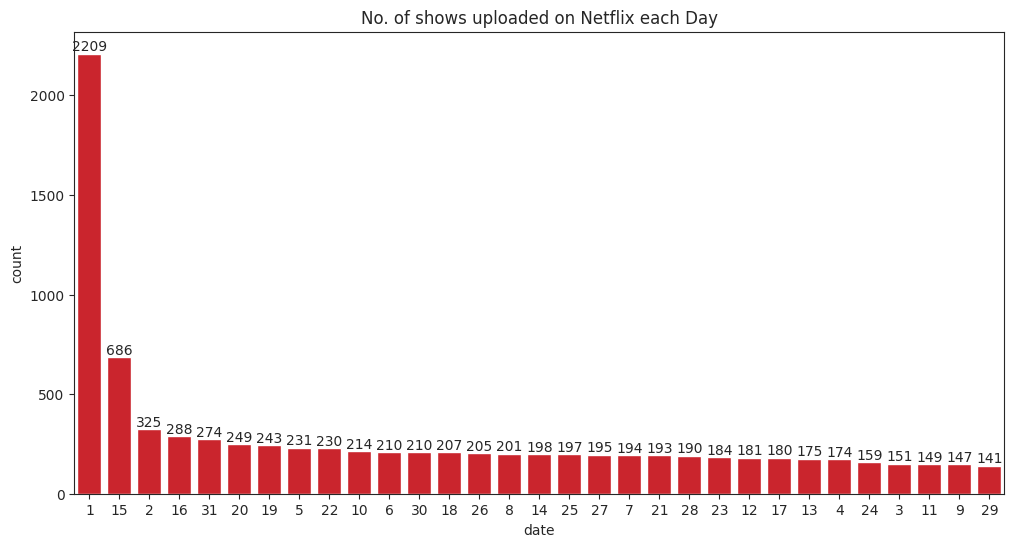

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.countplot(data=df, x="date", order=df["date"].value_counts().index, color="#E50914")
ax.set_title("No. of shows uploaded on Netflix each Day")
ax.bar_label(ax.containers[0], fontsize=10)
plt.show()

Insights

• In start and mid of the month, most number of shows are uploaded on Netflix.

• Least shows are uploaded near the end of the month.

In [ ]:
country_counts = df["country"].value_counts().head(10)

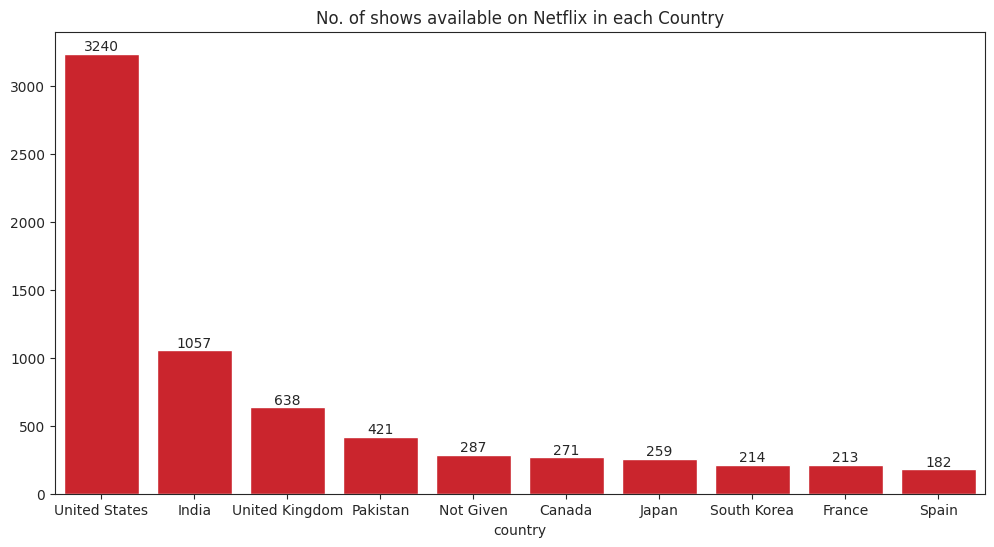

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.barplot(x=country_counts.index, y=country_counts.values, color="#E50914")
ax.set_title("No. of shows available on Netflix in each Country")
ax.bar_label(ax.containers[0], fontsize=10)
plt.show()

Insights

• Most number of shows are uploaded for United States.

• India has the second largest collection of shows available on Netflix.

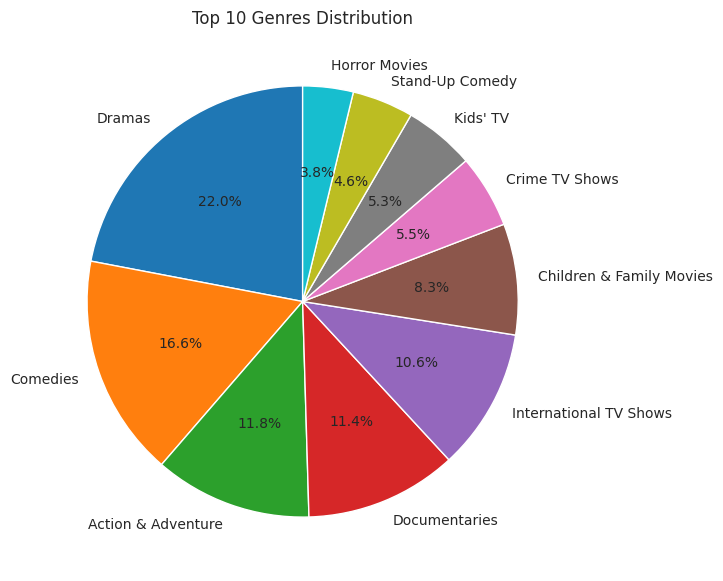

In [ ]:
genre_counts = df['genre'].value_counts()

# Keep only the top 10 genres
top_10_genres = genre_counts.nlargest(10)

# Plotting the pie chart using matplotlib
plt.figure(figsize=(7, 7))  # Set figure size
plt.pie(top_10_genres, labels=top_10_genres.index, autopct='%1.1f%%', startangle=90)

# Adding title
plt.title('Top 10 Genres Distribution')

# Show the plot
plt.show()

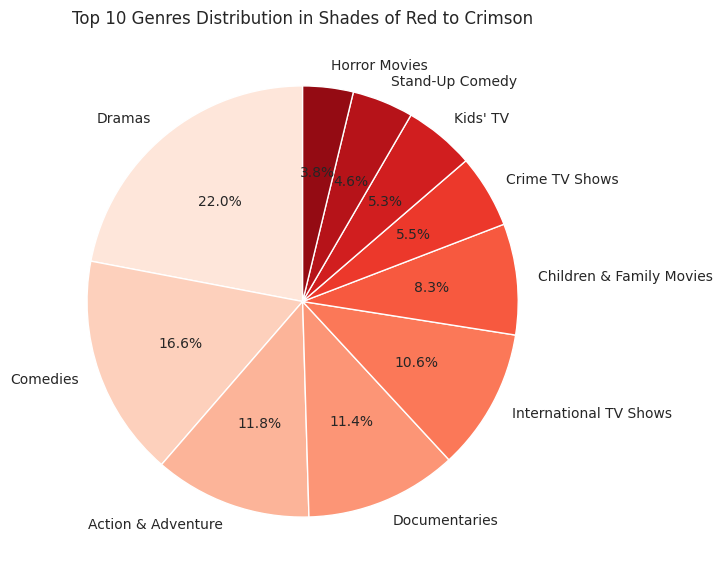

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.colors as mcolors

# Count the occurrences of each genre
genre_counts = df['genre'].value_counts()

# Keep only the top 10 genres
top_10_genres = genre_counts.nlargest(10)

# Create a list of 10 different shades from red to crimson using seaborn color_palette
colors = sns.color_palette("Reds", n_colors=10)

# Plotting the pie chart using matplotlib
plt.figure(figsize=(7, 7))  # Set figure size
plt.pie(top_10_genres, labels=top_10_genres.index, autopct='%1.1f%%', startangle=90, colors=colors)

# Adding title
plt.title('Top 10 Genres Distribution in Shades of Red to Crimson')

# Show the plot
plt.show()


Insights



*   Drama is the most popular genre
*   Horror movies, although in the top 10 genres, are not watched a lot



In [ ]:
genre_mean_movies = movies_df.groupby(["genre"])["duration_min"].mean().round().sort_values(ascending=False)

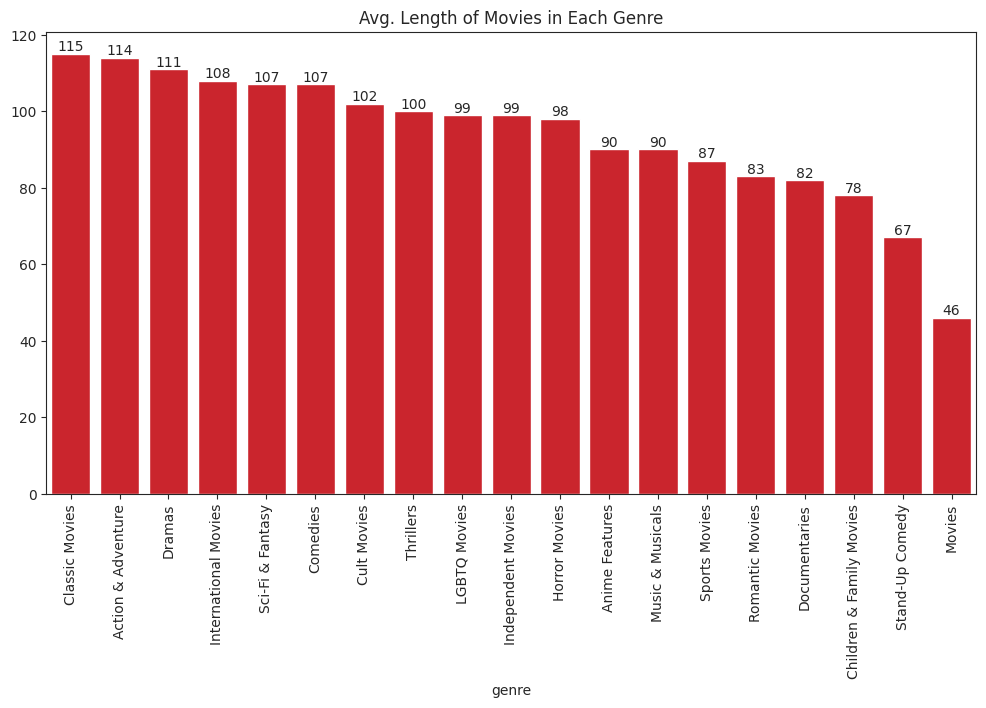

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.barplot(x=genre_mean_movies.index, y=genre_mean_movies.values, color="#E50914")
ax.set_title("Avg. Length of Movies in Each Genre")
ax.tick_params(axis='x', rotation=90)
ax.bar_label(ax.containers[0], fontsize=10)
plt.show()

Insights

• Classic Movies on Netflix has the longest runtime approx (2 Hour 10 Minutes).

• Action and Adventure has the second longest runtime approx (2 Hours).

In [ ]:
genre_mean_tv = tv_shows_df.groupby(["genre"])["duration_season"].mean().round().sort_values(ascending=False)

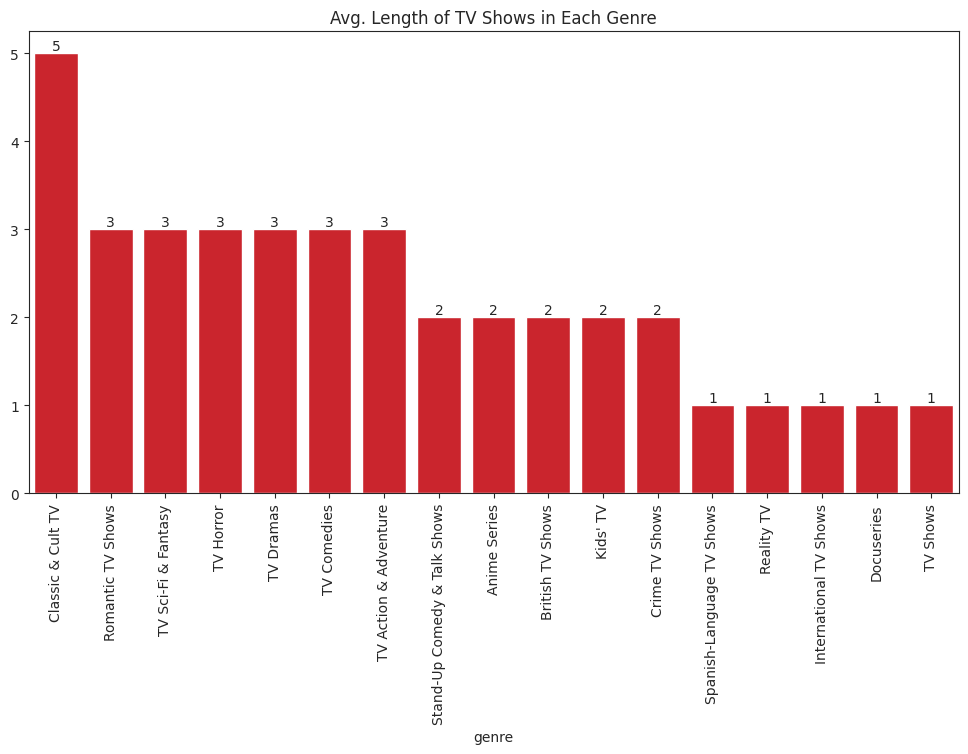

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.barplot(x=genre_mean_tv.index, y=genre_mean_tv.values, color="#E50914")
ax.set_title("Avg. Length of TV Shows in Each Genre")
ax.tick_params(axis='x', rotation=90)
ax.bar_label(ax.containers[0], fontsize=10)
plt.show()


Avg. Length of TV Shows in each Genre

Insights

• Classic and Cult TV Shows on Netflix has the longest runtime approx (6 Seasons).

• Romantic, Fantasy, Horror, Drama, Comedy and Adventure has second largest runtime approx (3 Seasons).

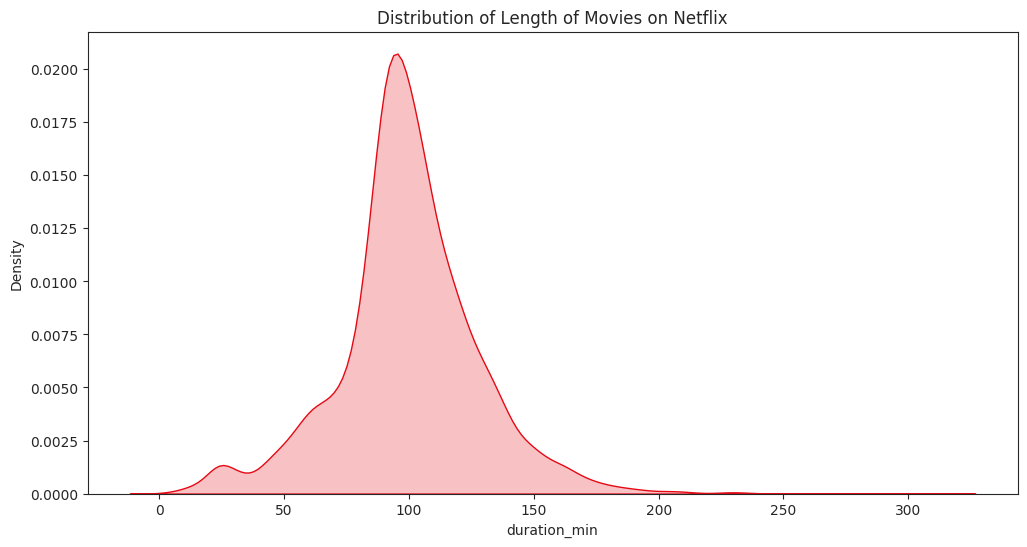

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.kdeplot(movies_df["duration_min"], color="#E50914", fill=True)
ax.set_title("Distribution of Length of Movies on Netflix")
plt.show()

Insights

• Most number of Movies on Netflix has the runtime between 75 min to 125 min.

• Only few movies on Netflix are shorter than 75 min and larger than 125 min.

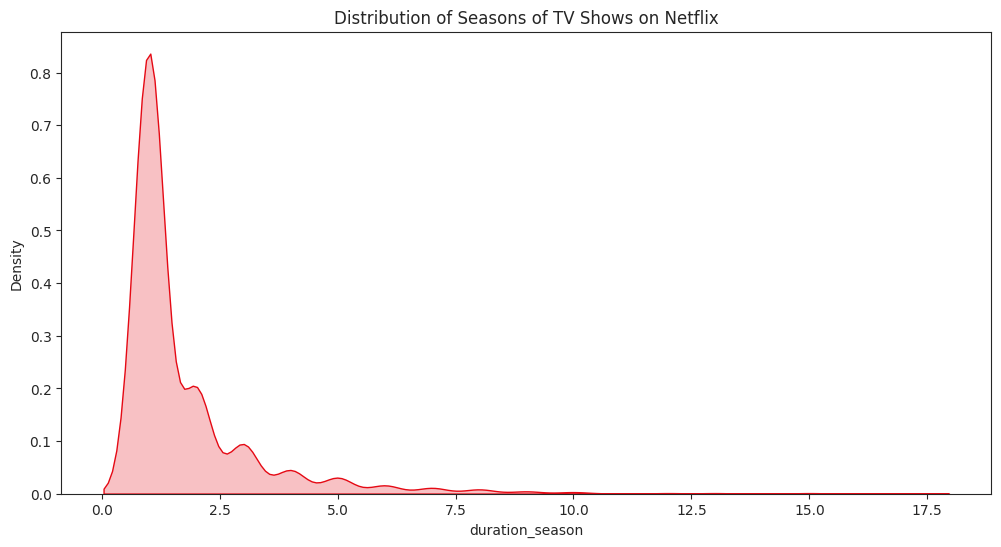

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.kdeplot(tv_shows_df["duration_season"], color="#E50914", fill=True)
ax.set_title("Distribution of Seasons of TV Shows on Netflix")
plt.show()

Insights

• Most number of TV Shows on Netflix has the runtime between 1 to 2 Seasons.

• Few TV Shows on Netflix has runtime between 3 to 6 Seasons.

• Very few TV Shows has runtime more than 8 Seasons.

In [ ]:
df.head()

,type,title,director,country,date_added,release_year,rating,duration,listed_in,year,month,date,genre
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,September,25,Documentaries
1,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,September,24,Crime TV Shows
2,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",2021,September,24,TV Dramas
3,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",2021,September,22,Children & Family Movies
4,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",2021,September,24,Dramas


from matplotlib import pyplot as plt
_df_0['release_year'].plot(kind='hist', bins=20, title='release_year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['date'].plot(kind='hist', bins=20, title='date')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('title').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('director').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('country').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='release_year', y='date', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date_added']
  ys = series['release_year']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('date_added', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('type')):
  _plot_series(series, series_name, i)
  fig.legend(title='type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date_added')
_ = plt.ylabel('release_year')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date_added']
  ys = series['release_year']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('date_added', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('title')):
  _plot_series(series, series_name, i)
  fig.legend(title='title', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date_added')
_ = plt.ylabel('release_year')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date_added']
  ys = series['release_year']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('date_added', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('director')):
  _plot_series(series, series_name, i)
  fig.legend(title='director', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date_added')
_ = plt.ylabel('release_year')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date_added']
  ys = series['release_year']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('date_added', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('country')):
  _plot_series(series, series_name, i)
  fig.legend(title='country', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date_added')
_ = plt.ylabel('release_year')

from matplotlib import pyplot as plt
_df_11['release_year'].plot(kind='line', figsize=(8, 4), title='release_year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['date'].plot(kind='line', figsize=(8, 4), title='date')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['title'].value_counts()
    for x_label, grp in _df_13.groupby('type')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('type')
_ = plt.ylabel('title')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['director'].value_counts()
    for x_label, grp in _df_14.groupby('title')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('title')
_ = plt.ylabel('director')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['country'].value_counts()
    for x_label, grp in _df_15.groupby('director')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('director')
_ = plt.ylabel('country')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['rating'].value_counts()
    for x_label, grp in _df_16.groupby('country')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('country')
_ = plt.ylabel('rating')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='release_year', y='type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['title'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='release_year', y='title', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['director'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='release_year', y='director', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['country'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='release_year', y='country', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

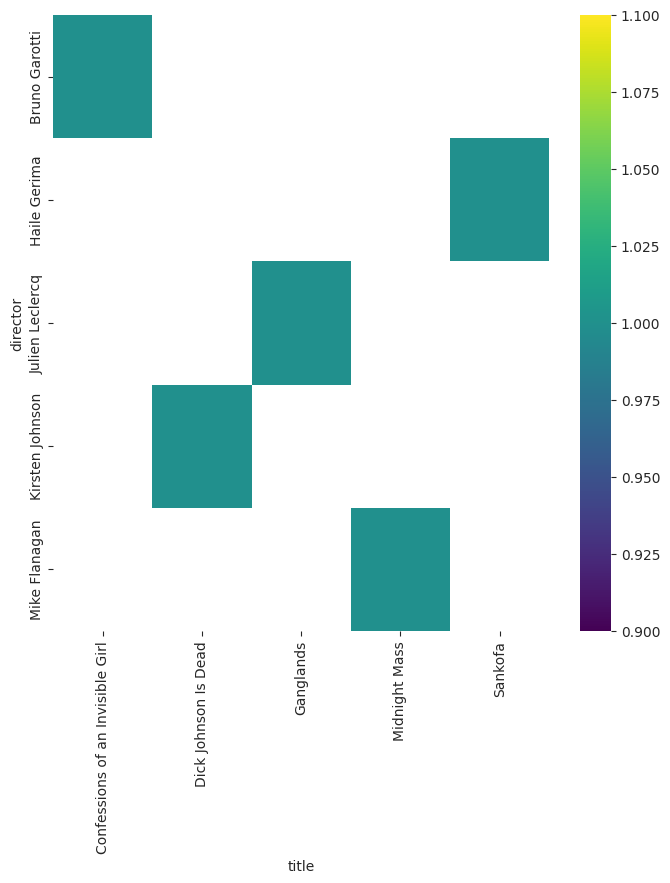

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['director'].value_counts()
    for x_label, grp in _df_14.groupby('title')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('title')
_ = plt.ylabel('director')

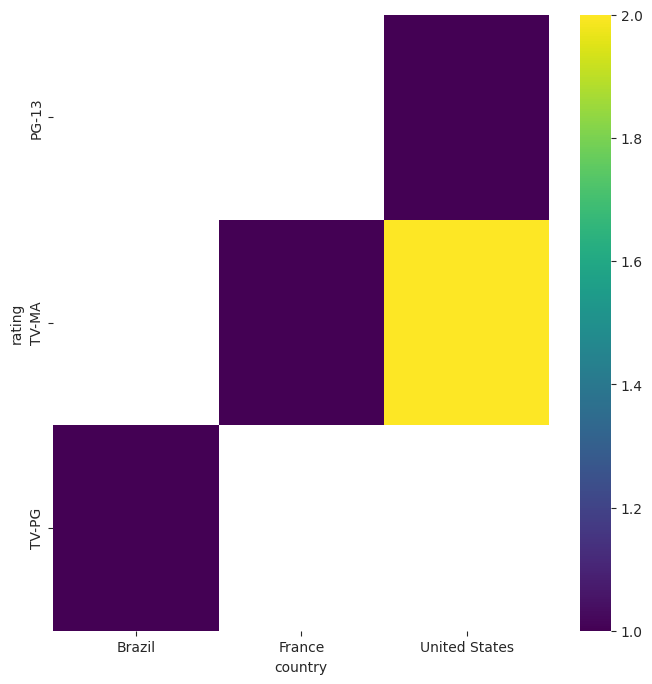

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['rating'].value_counts()
    for x_label, grp in _df_16.groupby('country')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('country')
_ = plt.ylabel('rating')